1) Pengumpulan data
Data dari https://archive.ics.uci.edu/dataset/45/heart+disease
*menggunakan cleveland

*pastikan data berasal dari sumber yg dpt dipercaya dan valid

2) Menelaah Data

*data berisi tentang faktor2 yg memengaruhi seseorang thdp penyakit jantung


In [1]:
# import library
import numpy as np
import pandas as pd
import re
import itertools

In [2]:
dir = "switzerland.data"

In [3]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['3001 0 65 1 1 1 1',
 '-9 4 115 0 0 -9 -9 -9',
 '0 -9 -9 0 1 9 85 0',
 '1 1 0 1 12 8.3 -9 100',
 '93 56 185 80 115 70 1 0',
 '0 2 -9 -9 -9 -9 -9 -9',
 '-9 -9 -9 7 -9 -9 -9 1',
 '11 85 1 1 2 1 1 1',
 '1 1 1 1 1 1 1 1',
 '1 1 75 -9. name']

In [4]:
# iterasi sesuai kolom & baris pd dataset

data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range (0, len(lines),10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,3001,0,65,1,1,1,1,-9,4,115,...,1,1,1,1,1,1,1,75,-9.,name
1,3002,0,32,1,0,0,0,-9,1,95,...,1,1,1,1,1,5,1,63,-9.,name
2,3003,0,61,1,1,1,1,-9,4,105,...,2,1,1,1,1,1,1,67,-9.,name
3,3004,0,50,1,1,1,1,-9,4,145,...,1,1,1,1,1,5,4,36,-9.,name
4,3005,0,57,1,1,1,1,-9,4,110,...,2,1,1,1,1,1,1,60,-9.,name


In [5]:
# informasi dataset yg telah dimasukan ke dlm dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       123 non-null    object
 1   1       123 non-null    object
 2   2       123 non-null    object
 3   3       123 non-null    object
 4   4       123 non-null    object
 5   5       123 non-null    object
 6   6       123 non-null    object
 7   7       123 non-null    object
 8   8       123 non-null    object
 9   9       123 non-null    object
 10  10      123 non-null    object
 11  11      123 non-null    object
 12  12      123 non-null    object
 13  13      123 non-null    object
 14  14      123 non-null    object
 15  15      123 non-null    object
 16  16      123 non-null    object
 17  17      123 non-null    object
 18  18      123 non-null    object
 19  19      123 non-null    object
 20  20      123 non-null    object
 21  21      123 non-null    object
 22  22      123 non-null    ob

In [6]:
# penghapusan fitur nilai null disimbolkan -9.0
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [7]:
# mengubah tipe data float jadi -9.0
df = df.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       123 non-null    float64
 1   2       123 non-null    float64
 2   3       123 non-null    float64
 3   4       123 non-null    float64
 4   5       123 non-null    float64
 5   6       123 non-null    float64
 6   7       123 non-null    float64
 7   8       123 non-null    float64
 8   9       123 non-null    float64
 9   10      123 non-null    float64
 10  11      123 non-null    float64
 11  12      123 non-null    float64
 12  13      123 non-null    float64
 13  14      123 non-null    float64
 14  15      123 non-null    float64
 15  16      123 non-null    float64
 16  17      123 non-null    float64
 17  18      123 non-null    float64
 18  19      123 non-null    float64
 19  20      123 non-null    float64
 20  21      123 non-null    float64
 21  22      123 non-null    float64
 22  23

3) Validasi Data

*data yg diperoleh dpt dipastikan valid, sebab data diperoleh pd sumber yg terpercaya

*data yg kosong/null akan teridentifikasi dg nilai -9.0, maka diganti jadi nilai null sesuai dataset

In [9]:
# mengubah nilai -9.0 jadi nilai null sesuai deskripsi dataset
df.replace(-9.0, np.nan, inplace=True)

In [10]:
# menghitung jml null value
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70     17
71     17
72     13
73     17
74    123
Length: 74, dtype: int64

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,65.0,1.0,1.0,1.0,1.0,NaN,4.0,115.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,75.0,NaN
1,0.0,32.0,1.0,0.0,0.0,0.0,NaN,1.0,95.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,63.0,NaN
2,0.0,61.0,1.0,1.0,1.0,1.0,NaN,4.0,105.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,67.0,NaN
3,0.0,50.0,1.0,1.0,1.0,1.0,NaN,4.0,145.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,36.0,NaN
4,0.0,57.0,1.0,1.0,1.0,1.0,NaN,4.0,110.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,60.0,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       123 non-null    float64
 1   2       123 non-null    float64
 2   3       123 non-null    float64
 3   4       123 non-null    float64
 4   5       123 non-null    float64
 5   6       123 non-null    float64
 6   7       0 non-null      float64
 7   8       123 non-null    float64
 8   9       121 non-null    float64
 9   10      93 non-null     float64
 10  11      123 non-null    float64
 11  12      23 non-null     float64
 12  13      11 non-null     float64
 13  14      2 non-null      float64
 14  15      48 non-null     float64
 15  16      8 non-null      float64
 16  17      2 non-null      float64
 17  18      122 non-null    float64
 18  19      122 non-null    float64
 19  20      122 non-null    float64
 20  21      122 non-null    float64
 21  22      118 non-null    float64
 22  23

4) Menentukan Object Data

*objek data yg dipilih adlh fitur yg kemungkinan krusial/penting dlm penyakit jantung

In [13]:
# memilih 14 fitur yg akan digunakan
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [14]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,65.0,1.0,4.0,115.0,0.0,0.0,0.0,93.0,1.0,0.0,2.0,NaN,7.0,1.0
1,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
2,61.0,1.0,4.0,105.0,0.0,NaN,0.0,110.0,1.0,1.5,1.0,NaN,NaN,1.0
3,50.0,1.0,4.0,145.0,0.0,NaN,0.0,139.0,1.0,0.7,2.0,NaN,NaN,1.0
4,57.0,1.0,4.0,110.0,0.0,NaN,1.0,131.0,1.0,1.4,1.0,1.0,NaN,3.0


In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       123 non-null    float64
 1   3       123 non-null    float64
 2   8       123 non-null    float64
 3   9       121 non-null    float64
 4   11      123 non-null    float64
 5   15      48 non-null     float64
 6   18      122 non-null    float64
 7   31      122 non-null    float64
 8   37      122 non-null    float64
 9   39      117 non-null    float64
 10  40      106 non-null    float64
 11  43      5 non-null      float64
 12  50      73 non-null     float64
 13  57      123 non-null    float64
dtypes: float64(14)
memory usage: 13.6 KB


In [16]:
# mengganti nama kolom sesuai dg 14 nama kolom pd deskripsi dataset
column_mapping = {
    2: "age",
    3: "sex",
    8: "cp",
    9: "trestbps",
    11: "chol",
    15: "fbs",
    18: "restecg",
    31: "thalach",
    37: "exang",
    39: "oldpeak",
    40: "slope",
    43: "ca",
    50: "thal",
    57: "target"
}

df_selected.rename (columns=column_mapping, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17092\2336362687.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename (columns=column_mapping, inplace=True)


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       123 non-null    float64
 1   sex       123 non-null    float64
 2   cp        123 non-null    float64
 3   trestbps  121 non-null    float64
 4   chol      123 non-null    float64
 5   fbs       48 non-null     float64
 6   restecg   122 non-null    float64
 7   thalach   122 non-null    float64
 8   exang     122 non-null    float64
 9   oldpeak   117 non-null    float64
 10  slope     106 non-null    float64
 11  ca        5 non-null      float64
 12  thal      73 non-null     float64
 13  target    123 non-null    float64
dtypes: float64(14)
memory usage: 13.6 KB


In [18]:
# menghitung jml fitur pd dataset
df_selected.value_counts()

Series([], dtype: int64)

5) Membersihkan Data

*fitur yg akan digunakan mayoritas tdk ada nnilai null/kosong

*hanya ada 2 fitur ('ca' dan 'thal', dg 2 nilai null)

*karena fitur dg nilai null tdk banyak dan nilai null dari msg2 fitur sedikit, maka tdk perlu dilakukan penghapusan dg fungsi drop

*gunakan mean agar nilai null yg tersisa menjadi 0

In [19]:
# menghitung jml null values di dlm dataset
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         50
target        0
dtype: int64



*   karena fitur yg punya nilai null hanya sedikit maka tdk perlu dilakukan penghapusan dg fungsi drop





In [20]:
# fitur yg hampir 90% memiliki nilai null, sehingga perlu dilakukan penghapusan
# penghapusan dg fungsi drop

columns_to_drop = ['fbs', 'ca', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     2
chol         0
restecg      1
thalach      1
exang        1
oldpeak      6
slope       17
target       0
dtype: int64

In [21]:
# msh ada nilai null di bbrp kolom, gunakan nilai mean di tiap kolom

meanTbps = df_selected['trestbps'].dropna()
meanRestecg = df_selected['restecg'].dropna()
meanThalach = df_selected['thalach'].dropna()
meanExang = df_selected['exang'].dropna()
meanOldpeak = df_selected['oldpeak'].dropna()
meanSlope = df_selected['slope'].dropna()

meanTbps = meanTbps.astype(float)
meanRestecg = meanRestecg.astype(float)
meanThalach = meanThalach.astype(float)
meanExang = meanExang.astype(float)
meanOldpeak = meanOldpeak.astype(float) 
meanSlope = meanSlope.astype(float)

meanTbps = round(meanTbps.mean())
meanRestecg = round(meanRestecg.mean())
meanThalach = round(meanThalach.mean())
meanExang = round(meanExang.mean())
meanOldpeak = round(meanOldpeak.mean())
meanSlope = round(meanSlope.mean())


In [22]:
# mengubah nilai null jadi nilai mean yg sudah ditentukan sblmnya
fill_values = {'trestbps': meanTbps,
               'restecg': meanRestecg,
               'thalach': meanThalach,
               'exang': meanExang,
               'oldpeak': meanOldpeak,
               'slope':meanSlope}
dfClean = df_selected.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       123 non-null    float64
 1   sex       123 non-null    float64
 2   cp        123 non-null    float64
 3   trestbps  123 non-null    float64
 4   chol      123 non-null    float64
 5   restecg   123 non-null    float64
 6   thalach   123 non-null    float64
 7   exang     123 non-null    float64
 8   oldpeak   123 non-null    float64
 9   slope     123 non-null    float64
 10  target    123 non-null    float64
dtypes: float64(11)
memory usage: 10.7 KB


In [23]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [24]:
# pengecekan thd duplikasi data
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target


Tidak ada duplikasi data

In [25]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target


In [26]:
# Menghapus data yang memiliki duplikat
# Karena data tdk ada duplikat maka dpt dilewati

# dfClean = dfClean.drop_duplicates()
# print("All Duplicate Rows:")
# dfClean[dfClean.duplicated(keep=False)]

# dfClean.head()

In [27]:
dfClean['target'].value_counts()

1.0    48
2.0    32
3.0    30
0.0     8
4.0     5
Name: target, dtype: int64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Mencari korelasi antar fitur
dfClean.corr()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target
age,1.000000,-0.049042,-0.033295,0.357636,NaN,0.274539,-0.283465,-0.033004,0.139791,0.077348,0.050689
sex,-0.049042,1.000000,0.043017,-0.084065,NaN,0.080047,-0.121681,0.083337,-0.040291,-0.036262,0.089853
cp,-0.033295,0.043017,1.000000,-0.017277,NaN,-0.237887,-0.056236,0.268548,0.184626,0.054803,0.232277
trestbps,0.357636,-0.084065,-0.017277,1.000000,NaN,0.190512,-0.207305,0.127946,0.085952,-0.097923,0.135510
chol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,0.274539,0.080047,-0.237887,0.190512,NaN,1.000000,0.009322,-0.120658,-0.081097,-0.059467,0.049268
thalach,-0.283465,-0.121681,-0.056236,-0.207305,NaN,0.009322,1.000000,-0.221455,0.155986,-0.158363,-0.293710
exang,-0.033004,0.083337,0.268548,0.127946,NaN,-0.120658,-0.221455,1.000000,0.170161,0.175594,0.122321
oldpeak,0.139791,-0.040291,0.184626,0.085952,NaN,-0.081097,0.155986,0.170161,1.000000,-0.057428,0.192674
slope,0.077348,-0.036262,0.054803,-0.097923,NaN,-0.059467,-0.158363,0.175594,-0.057428,1.000000,-0.029116


<AxesSubplot:>

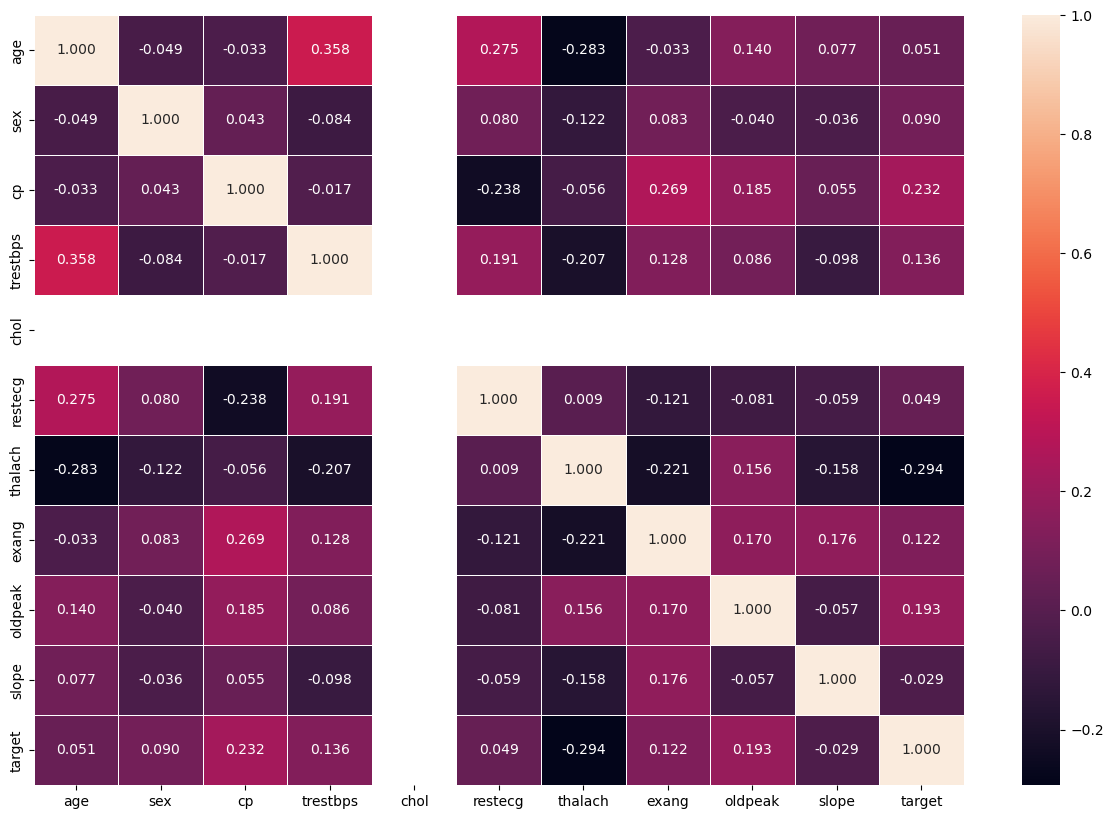

In [30]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

6) Konstruksi Data

*dlm kasus ini, tdk perlu u/ menambahkan fitur baru

In [31]:
# bertujuan u/ menyesuaikan semua tipe data di dlm dataset
# dlm tahap ini dataset sdh punya tipe data yg sama, shg tdk dilakukan penyesuaian lagi
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       123 non-null    float64
 1   sex       123 non-null    float64
 2   cp        123 non-null    float64
 3   trestbps  123 non-null    float64
 4   chol      123 non-null    float64
 5   restecg   123 non-null    float64
 6   thalach   123 non-null    float64
 7   exang     123 non-null    float64
 8   oldpeak   123 non-null    float64
 9   slope     123 non-null    float64
 10  target    123 non-null    float64
dtypes: float64(11)
memory usage: 10.7 KB


In [32]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target
0,65.0,1.0,4.0,115.0,0.0,0.0,93.0,1.0,0.0,2.0,1.0
1,32.0,1.0,1.0,95.0,0.0,0.0,127.0,0.0,0.7,1.0,1.0
2,61.0,1.0,4.0,105.0,0.0,0.0,110.0,1.0,1.5,1.0,1.0
3,50.0,1.0,4.0,145.0,0.0,0.0,139.0,1.0,0.7,2.0,1.0
4,57.0,1.0,4.0,110.0,0.0,1.0,131.0,1.0,1.4,1.0,3.0


7) Menentukan Label Data

In [33]:
# memisahkan fitur & target lalu simpan ke variabel
X = dfClean.drop('target',axis=1).values
y = dfClean.iloc[:,-1]

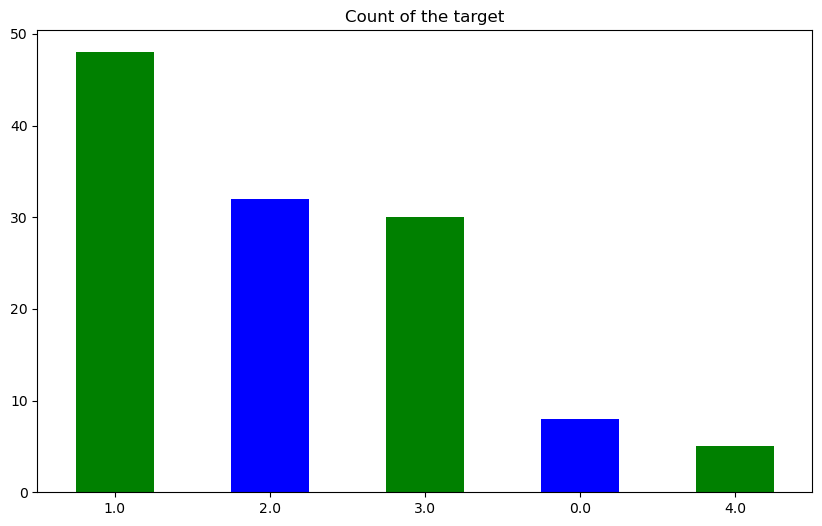

In [34]:
# cek persebaran jml target
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue'])
plt.title('Count of the target')
plt.xticks(rotation=0);



*   grafik menunjukan persebaran target tdk seimbang, perlu diseimbangkan
*   penyeimbangan ada 2, oversampilng & under sampling

  ***Oversampling***, jika jml dataset sedikit
  
   ***Undersampling***, jika jmml dataset terlalu banyak


*   Dlm case ini akan melakukan ***Oversampling*** krn data tdk banyak, dg menggunakan metode SMOTE

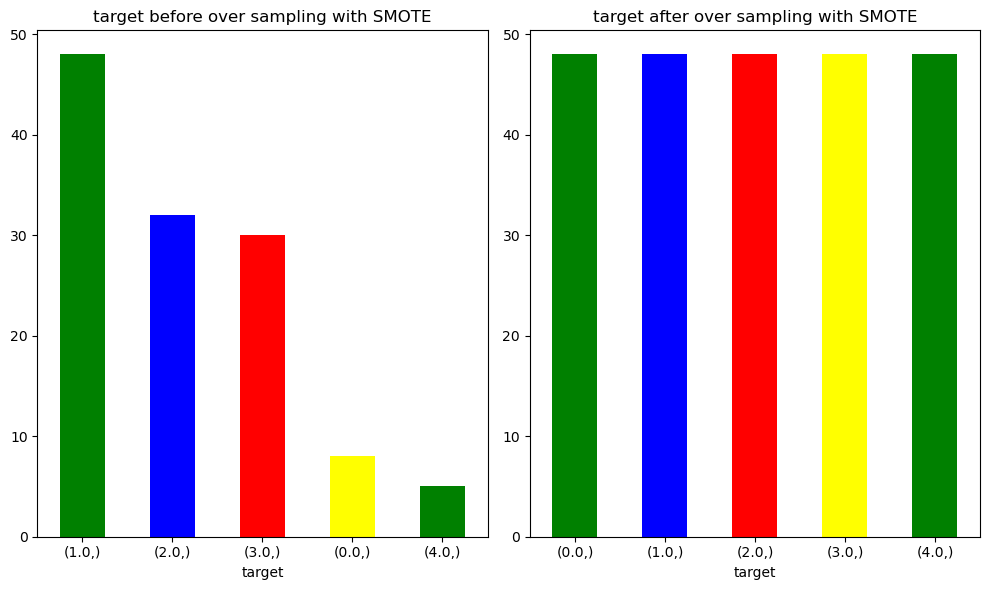

In [35]:
from imblearn.over_sampling import SMOTE


# oversampling
smote = SMOTE(random_state=42, k_neighbors=4)               #k_neighbors <= k_samples
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target before over sampling with SMOTE')
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green','blue','red','yellow'])
plt.title('target after over sampling with SMOTE')
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [36]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
1.0       48
2.0       32
3.0       30
0.0        8
4.0        5
dtype: int64

In [37]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       48
1.0       48
2.0       48
3.0       48
4.0       48
dtype: int64

In [38]:
# cek apakah perlu normalisai/ standarisasi
dfClean.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target
count,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,55.317073,0.918699,3.699187,130.203252,0.0,0.357724,121.560976,0.439024,0.670732,1.829268,1.804878
std,9.032108,0.274414,0.688726,22.373491,0.0,0.588553,25.870784,0.498298,1.032483,0.582636,1.013503
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,104.500000,0.000000,0.000000,1.000000,1.000000
50%,56.000000,1.000000,4.000000,130.000000,0.0,0.000000,121.000000,0.000000,0.500000,2.000000,2.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,1.000000,140.000000,1.000000,1.450000,2.000000,3.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,2.000000,182.000000,1.000000,3.700000,3.000000,4.000000


In [39]:
# rentang cukup jauh pd standar deviasi tiap fitur
# perlu normalisai/ standarisasi u/ memperkecil standar deviasi tiap kolom

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled)

240

In [40]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,240.000000,240.000000,240.000000,240.000000,240.0,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.541410,0.957569,0.882437,0.409742,0.0,0.196139,0.504411,0.405542,0.521976,0.381511
std,0.193243,0.200434,0.223710,0.160174,0.0,0.278650,0.199974,0.462678,0.141080,0.273196
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.437750,1.000000,0.870862,0.291667,0.0,0.000000,0.352172,0.000000,0.412698,0.061935
50%,0.546800,1.000000,1.000000,0.383017,0.0,0.000000,0.494910,0.000000,0.514628,0.500000
75%,0.669743,1.000000,1.000000,0.500000,0.0,0.476847,0.648256,1.000000,0.619118,0.500000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# membagi fitur & target jadi data train & data test
from sklearn.model_selection import train_test_split

# u/ yg oversample saja
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# u/ yg oversample + normalisasi
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

8) Model

In [42]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
               }
  return print(metric_dict)

Model KNN dg K = 3

In [43]:
# Model KNN dg K = 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# menampilkan akurasi KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN model
print('K-Nearest Neighbors (KNN) Model :')
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print('Accuracy:', accuracy_knn_smote)
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model :
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.44      0.80      0.57        10
         1.0       0.50      0.33      0.40         9
         2.0       0.43      0.30      0.35        10
         3.0       0.56      0.50      0.53        10
         4.0       0.62      0.56      0.59         9

    accuracy                           0.50        48
   macro avg       0.51      0.50      0.49        48
weighted avg       0.51      0.50      0.49        48



In [45]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.5, 'recall': 0.5, 'F1 score': 0.488, 'Precision score': 0.509}


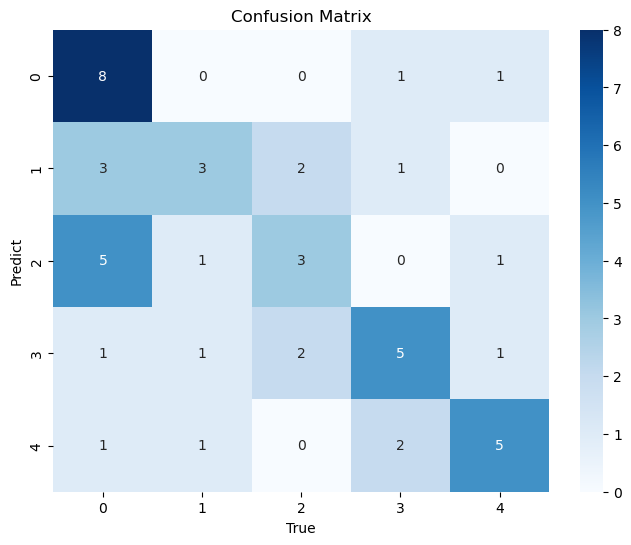

In [46]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [47]:
# random forest dg n-estimators = 100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# menampilkan akurasi random forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.688
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        10
         1.0       0.50      0.22      0.31         9
         2.0       0.70      0.70      0.70        10
         3.0       0.58      0.70      0.64        10
         4.0       0.73      0.89      0.80         9

    accuracy                           0.69        48
   macro avg       0.67      0.68      0.66        48
weighted avg       0.67      0.69      0.66        48



In [49]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.688, 'recall': 0.688, 'F1 score': 0.665, 'Precision score': 0.668}


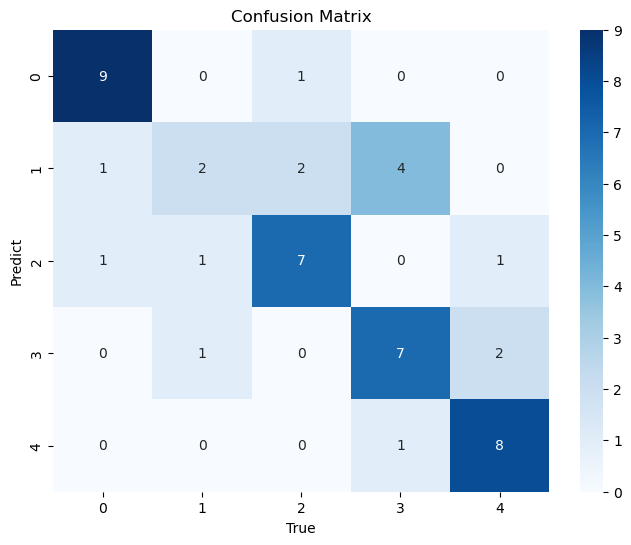

In [50]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [51]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [52]:
# menghitung akurasi xgboost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Model:
Accuracy: 0.708
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        10
         1.0       0.62      0.56      0.59         9
         2.0       1.00      0.50      0.67        10
         3.0       0.57      0.80      0.67        10
         4.0       0.70      0.78      0.74         9

    accuracy                           0.71        48
   macro avg       0.74      0.71      0.70        48
weighted avg       0.75      0.71      0.70        48



In [53]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.708, 'recall': 0.708, 'F1 score': 0.705, 'Precision score': 0.746}


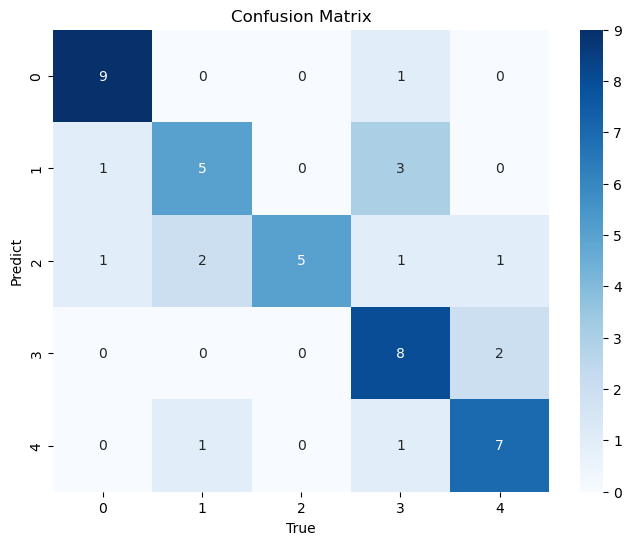

In [54]:
# visualisasi
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Oversample + Normalisasi***

KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

KNeighborsClassifier(n_neighbors=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [56]:
# hasil prediksi
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.604
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        10
         1.0       0.17      0.11      0.13         9
         2.0       0.50      0.40      0.44        10
         3.0       0.60      0.60      0.60        10
         4.0       0.82      1.00      0.90         9

    accuracy                           0.60        48
   macro avg       0.56      0.60      0.57        48
weighted avg       0.56      0.60      0.57        48



In [57]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.604, 'recall': 0.604, 'F1 score': 0.574, 'Precision score': 0.558}


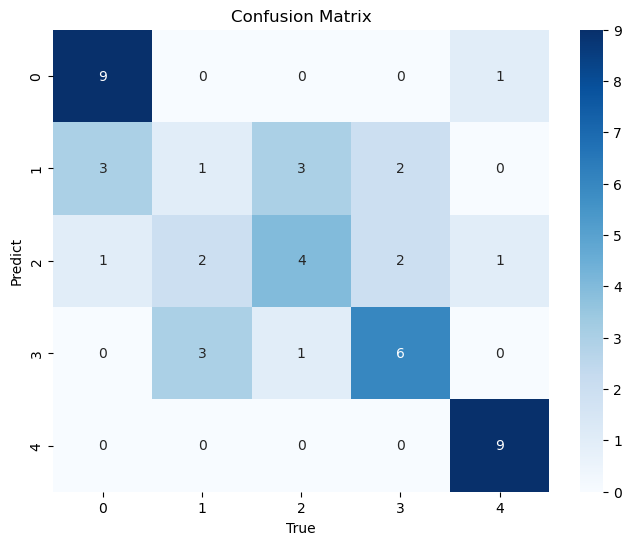

In [58]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [60]:
# hasil predict
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.708
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        10
         1.0       0.67      0.22      0.33         9
         2.0       0.73      0.80      0.76        10
         3.0       0.58      0.70      0.64        10
         4.0       0.73      0.89      0.80         9

    accuracy                           0.71        48
   macro avg       0.70      0.70      0.68        48
weighted avg       0.70      0.71      0.68        48



In [61]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.708, 'recall': 0.708, 'F1 score': 0.682, 'Precision score': 0.705}


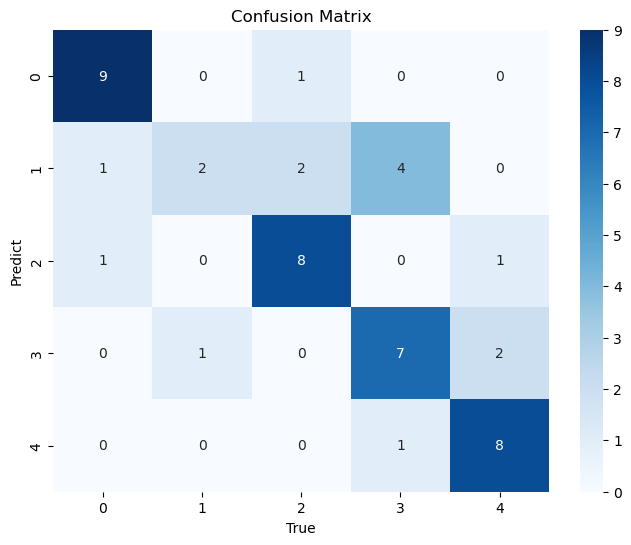

In [62]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [63]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [64]:
# hsl predict
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.708
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        10
         1.0       0.62      0.56      0.59         9
         2.0       1.00      0.50      0.67        10
         3.0       0.57      0.80      0.67        10
         4.0       0.70      0.78      0.74         9

    accuracy                           0.71        48
   macro avg       0.74      0.71      0.70        48
weighted avg       0.75      0.71      0.70        48



In [65]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.708, 'recall': 0.708, 'F1 score': 0.705, 'Precision score': 0.746}


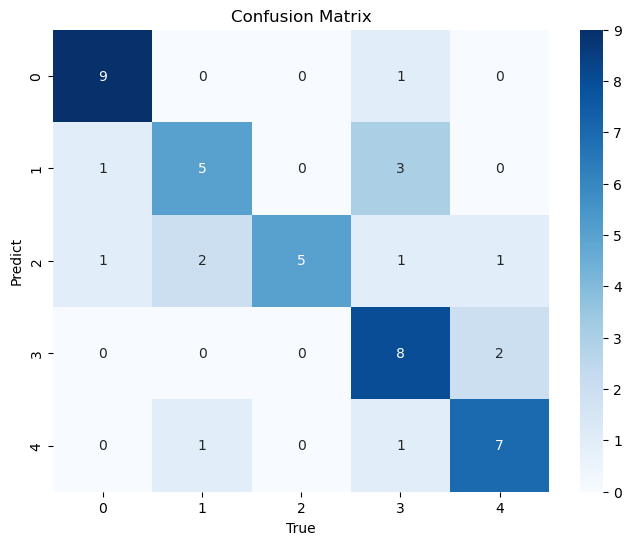

In [66]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Tunning + Normalisasi + Oversample***

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV # tunning

KNN

In [68]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
    }

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 54, 'algorithm': 'kd_tree'}


In [69]:
# hsl predict
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        10
         1.0       0.00      0.00      0.00         9
         2.0       0.62      0.50      0.56        10
         3.0       0.67      0.80      0.73        10
         4.0       0.75      1.00      0.86         9

    accuracy                           0.62        48
   macro avg       0.54      0.62      0.57        48
weighted avg       0.55      0.62      0.58        48



In [70]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.625, 'recall': 0.625, 'F1 score': 0.579, 'Precision score': 0.549}


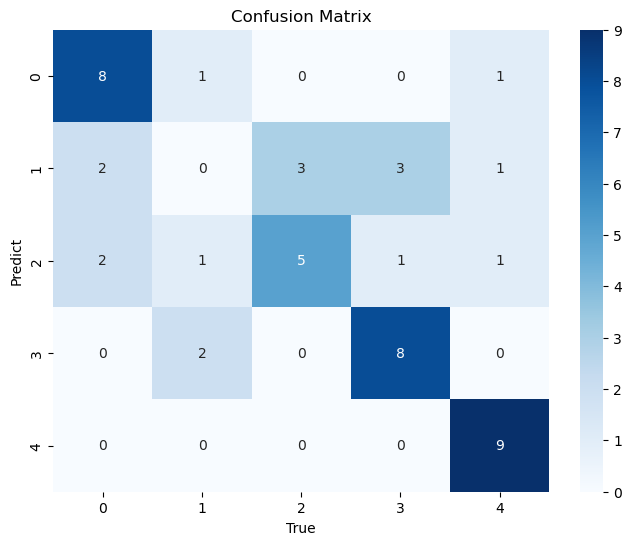

In [71]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***Random Forest***

In [72]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
    }

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

d:\ANACONDA\Anaconda_File2\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [73]:
# hsl predict
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.708
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        10
         1.0       0.57      0.44      0.50         9
         2.0       0.75      0.60      0.67        10
         3.0       0.64      0.70      0.67        10
         4.0       0.73      0.89      0.80         9

    accuracy                           0.71        48
   macro avg       0.70      0.71      0.70        48
weighted avg       0.70      0.71      0.70        48



In [74]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.708, 'recall': 0.708, 'F1 score': 0.7, 'Precision score': 0.703}


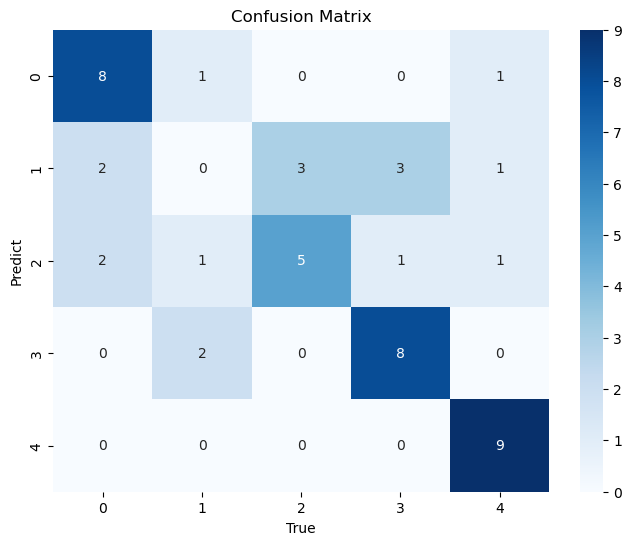

In [75]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

***XGBoost***

In [76]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
    }

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [77]:
# hsl predict
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.708
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.62      0.56      0.59         9
         2.0       1.00      0.50      0.67        10
         3.0       0.58      0.70      0.64        10
         4.0       0.73      0.89      0.80         9

    accuracy                           0.71        48
   macro avg       0.74      0.71      0.70        48
weighted avg       0.74      0.71      0.70        48



In [78]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.708, 'recall': 0.708, 'F1 score': 0.702, 'Precision score': 0.74}


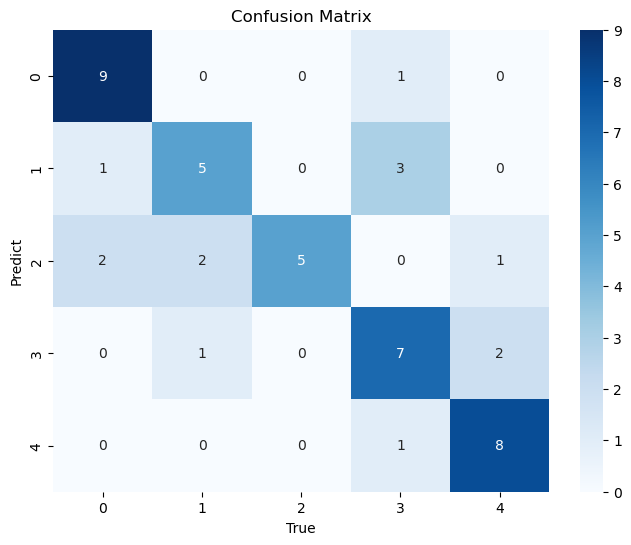

In [79]:
# visualisasi
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

9) ***Evaluasi***

Evaluasi model dg data yg di ***Oversample***

In [80]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,50.0
1,Random Forest,68.8
2,XGBoost,70.8


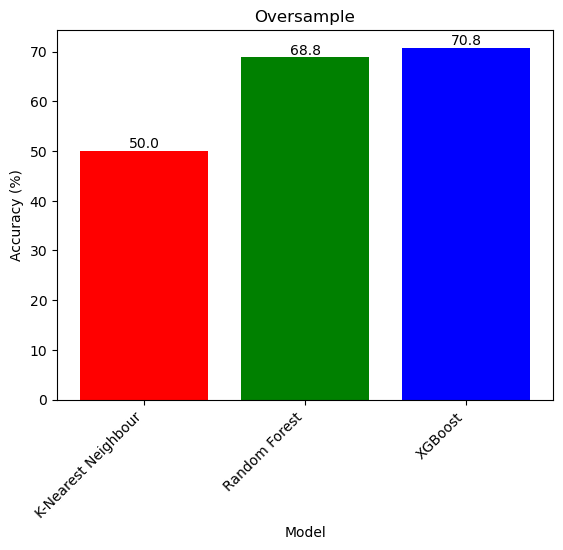

In [81]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Evaluasi model dg data yg di ***Normalization + Oversampling***

In [82]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,60.4
1,Random Forest,70.8
2,XGBoost,70.8


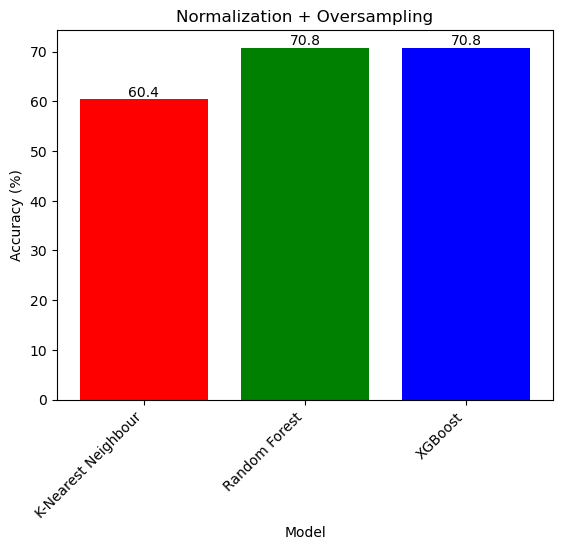

In [83]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Evaluasi model dg data yg di ***Normalization + Oversampling + Tunning***

In [84]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,62.5
1,Random Forest,70.8
2,XGBoost,70.8


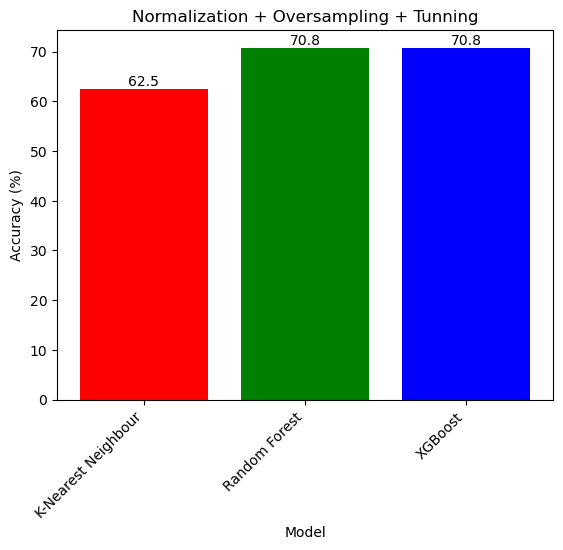

In [85]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

***Mencari Best Model***

In [86]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
                 accuracy_xgb_smote_normal_Tun*100]
})

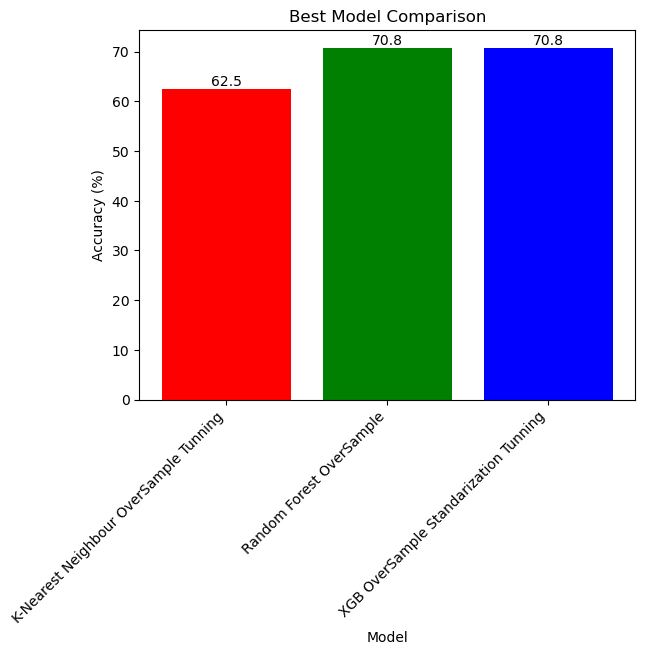

In [87]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [89]:
import pickle

# Save model dg pickle sblm deploy streamlit
with open('switzerland.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)